In [43]:
import pandas as pd

In [44]:
import matplotlib.pyplot as plt

In [45]:
import seaborn as sns

In [46]:
sleep_data = pd.read_csv('C:/Users/Vic/Desktop/Data Scienece/Datasets-20231016/Sleep_health_and_lifestyle_dataset.csv')

In [47]:
sleep_data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [48]:
sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [49]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


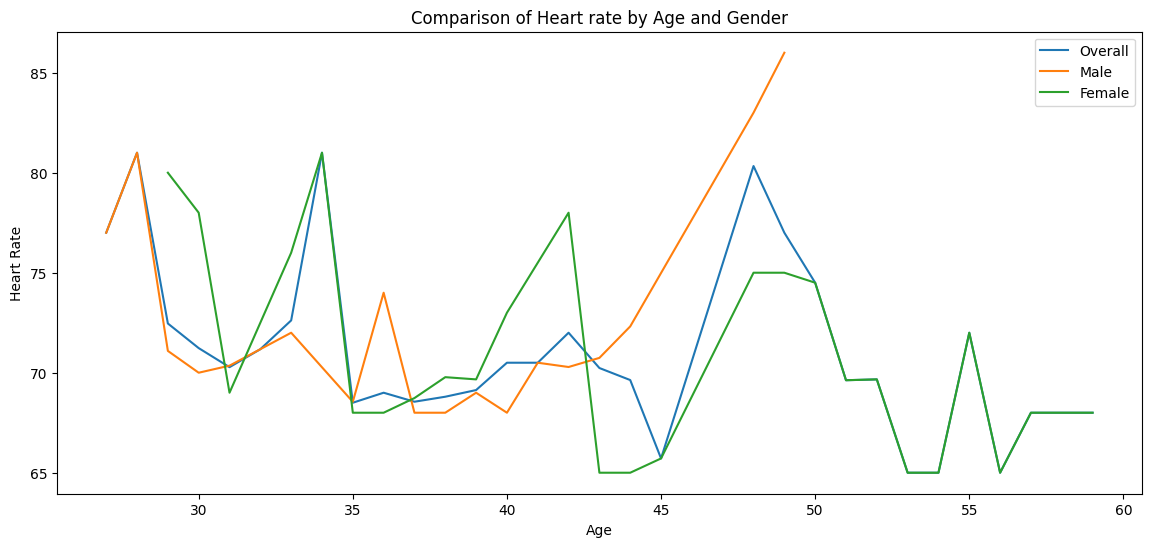

In [98]:
# Question 1: How does the average heart rate change as people get older?
plt.figure(figsize=(14, 6))
sns.lineplot(x='Age', y='Heart Rate', data=sleep_data, errorbar = None, label = 'Overall')
sns.lineplot(x='Age', y='Heart Rate', data=sleep_data[sleep_data['Gender'] == 'Male'],errorbar = None, label = 'Male')
sns.lineplot(x='Age', y='Heart Rate', data=sleep_data[sleep_data['Gender'] == 'Female'], errorbar = None, label = 'Female')
# sns.lineplot automatically gives us the mean Hert Rates 
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.title('Comparison of Heart rate by Age and Gender')
plt.show()

              Occupation  Heart Rate
2               Engineer   67.190476
10               Teacher   67.225000
0             Accountant   68.864865
3                 Lawyer   69.638298
1                 Doctor   71.521127
5                  Nurse   72.000000
7            Salesperson   72.000000
4                Manager   75.000000
9      Software Engineer   75.500000
8              Scientist   78.500000
6   Sales Representative   85.000000


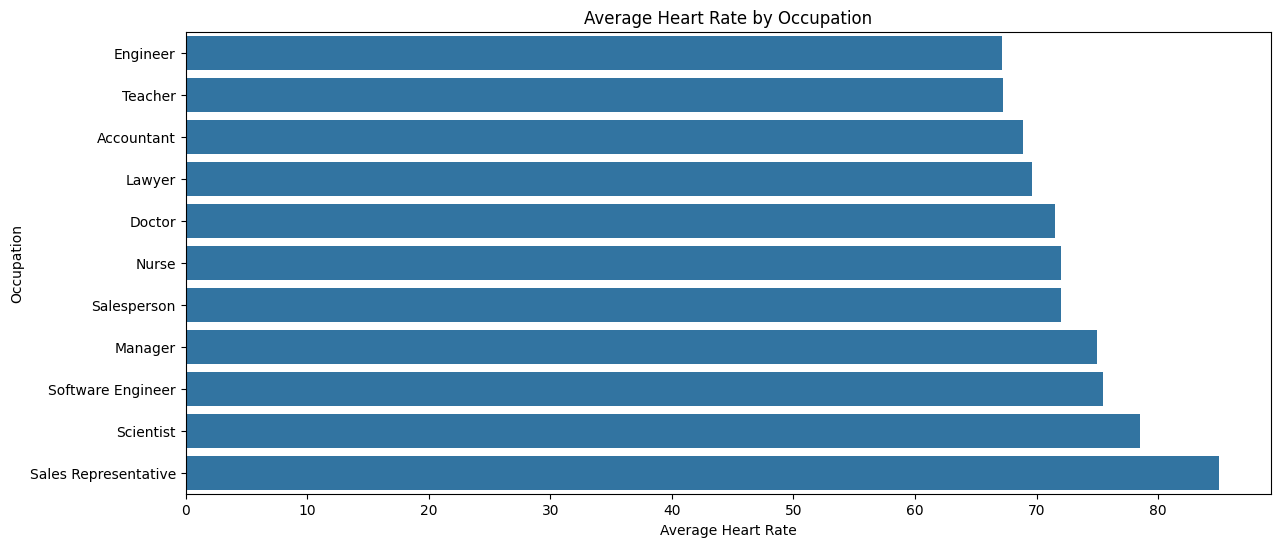

In [67]:
# What are the average heart rates for each occupation?
average_heart_rate = sleep_data.groupby('Occupation')['Heart Rate'].mean().reset_index()
# Here we reset_index to move 'Occupation' from the index into a regular column of the DataFrame

average_heart_rate =average_heart_rate.sort_values('Heart Rate')
print (average_heart_rate)
plt.figure(figsize=(14, 6))
sns.barplot(x = 'Heart Rate', y = 'Occupation', data = average_heart_rate,)
plt.title('Average Heart Rate by Occupation')
plt.xlabel('Average Heart Rate')
plt.ylabel('Occupation')
plt.show()


Text(0.5, 1.0, 'Influence of sleep duration on heart rate')

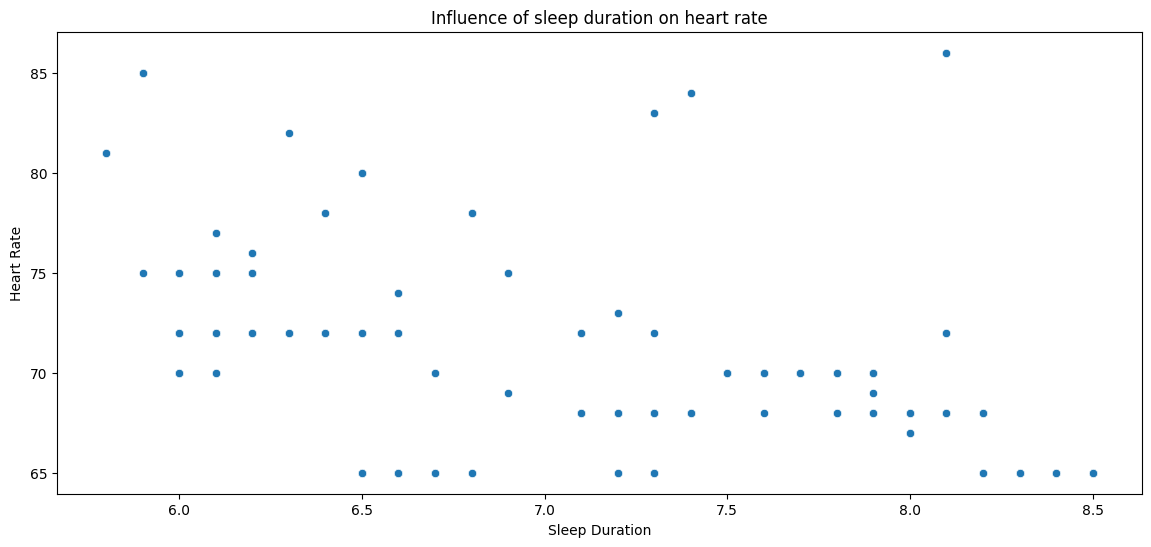

In [78]:
# How does Sleep duration influence the heart rate?
plt.figure(figsize=(14,6))
sns.scatterplot(x=sleep_data['Sleep Duration'], y= sleep_data['Heart Rate'])
plt.title('Influence of sleep duration on heart rate')

<Axes: xlabel='Sleep Duration', ylabel='Heart Rate'>

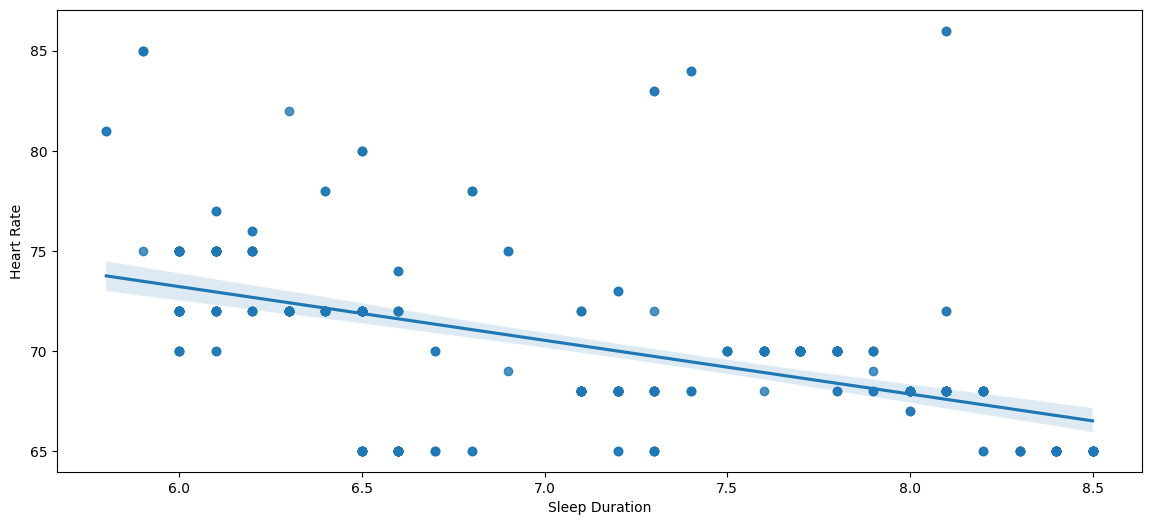

In [75]:
plt.figure(figsize=(14,6))
sns.regplot(x=sleep_data['Sleep Duration'], y= sleep_data['Heart Rate'])
# It shows a negative correlation between sleep duration and heart rate, so individuals with longer sleep durations tend to have lower heart rates

In [88]:
blood_pressure_split = sleep_data['Blood Pressure'].str.split('/', expand = True)
print(blood_pressure_split)
sleep_data['Systolic'] = pd.to_numeric(blood_pressure_split[0])
sleep_data['Diastolic'] = pd.to_numeric(blood_pressure_split[1])
sleep_data.head()

       0   1
0    126  83
1    125  80
2    125  80
3    140  90
4    140  90
..   ...  ..
369  140  95
370  140  95
371  140  95
372  140  95
373  140  95

[374 rows x 2 columns]


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [90]:
correlation_systolic = sleep_data['Systolic'].corr(sleep_data['Heart Rate'])
correlation_diastolic = sleep_data['Diastolic'].corr(sleep_data['Heart Rate'])

print('Correalation between Systolic BP and Heart Rate:', correlation_systolic)
print('Correalation between Diastolic BP and Heart Rate:', correlation_diastolic)

Correalation between Systolic BP and Heart Rate: 0.29414292125640323
Correalation between Diastolic BP and Heart Rate: 0.2710922189824596


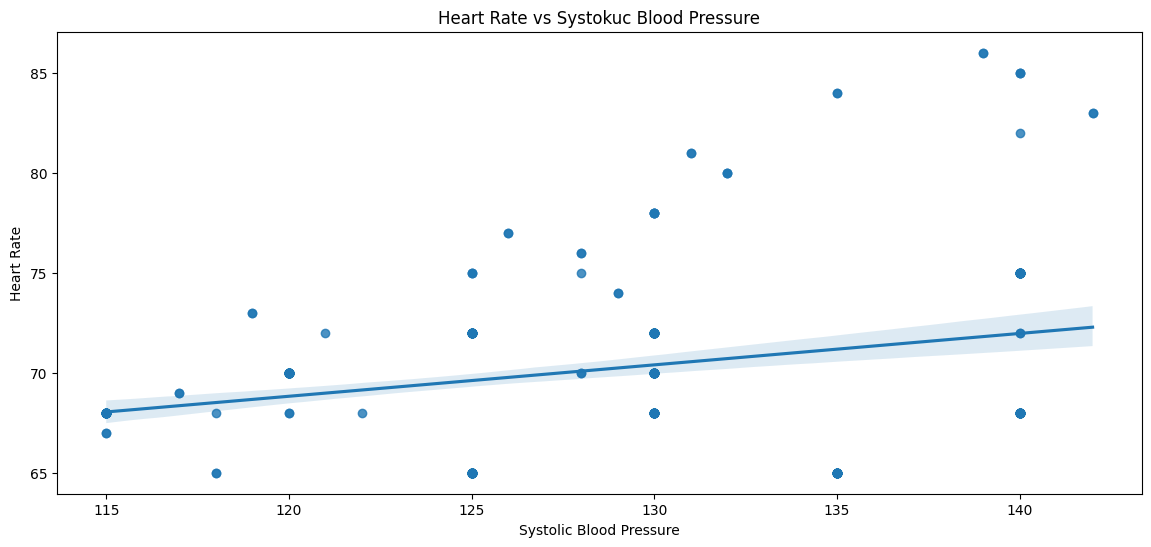

In [92]:
plt.figure(figsize=(14, 6))
sns.regplot(x = 'Systolic', y = 'Heart Rate', data = sleep_data)
plt.title('Heart Rate vs Systolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Heart Rate')
plt.show()

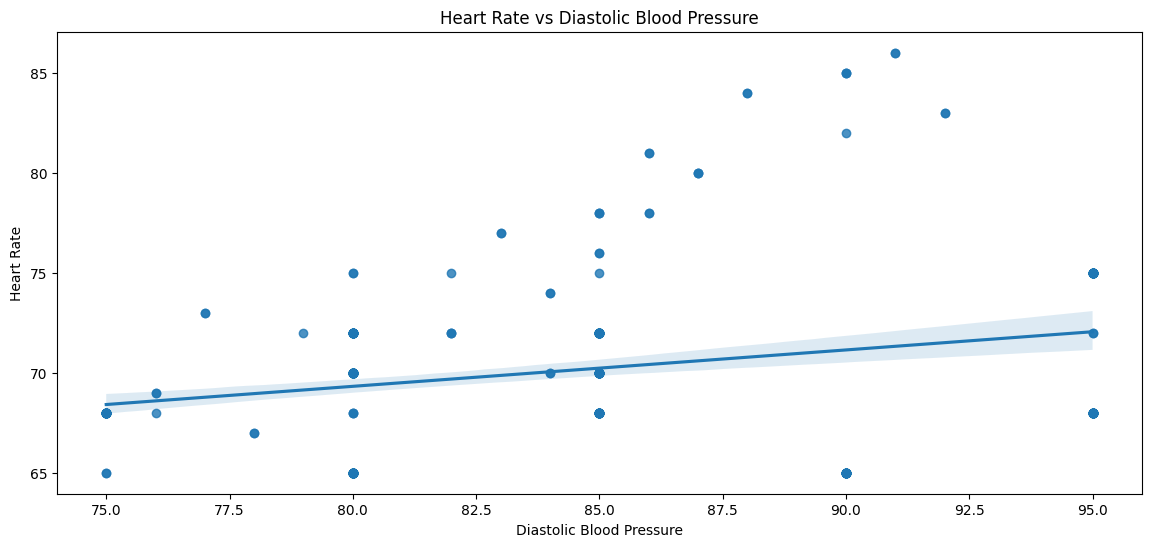

In [93]:
plt.figure(figsize=(14, 6))
sns.regplot(x = 'Diastolic', y = 'Heart Rate', data = sleep_data)
plt.title('Heart Rate vs Diastolic Blood Pressure')
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Heart Rate')
plt.show()